In [79]:
pip install scikit-learn==1.6.1

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df = pd.read_csv(r"F:\medical_cost_prediction\data\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA:Exploratory Data Analysis

In [82]:
print(df.info())
print(df.describe())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

(1338, 7)

### Distribution of charges

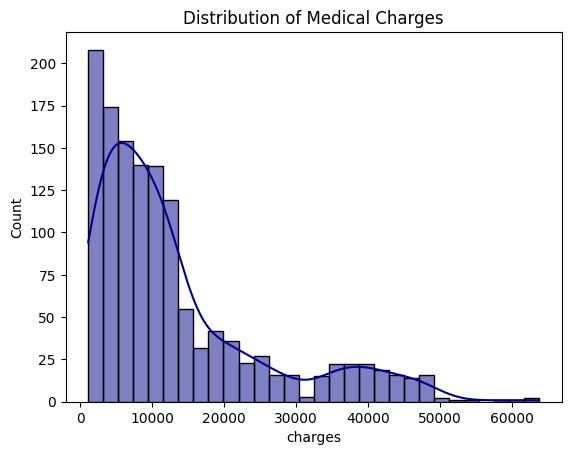

In [83]:
sns.histplot(df['charges'],kde=True,color='darkblue')
plt.title("Distribution of Medical Charges")
plt.show()

The histogram displays the distribution of medical charges in the dataset. It shows a right-skewed distribution, where the majority of medical charges are clustered towards the lower end, predominantly below 20,000. There is a long tail extending towards higher charges, indicating a smaller number of individuals with significantly higher medical expenses. This skewness suggests that the data is not normally distributed and may contain outliers on the higher end.

## Age vs Charges

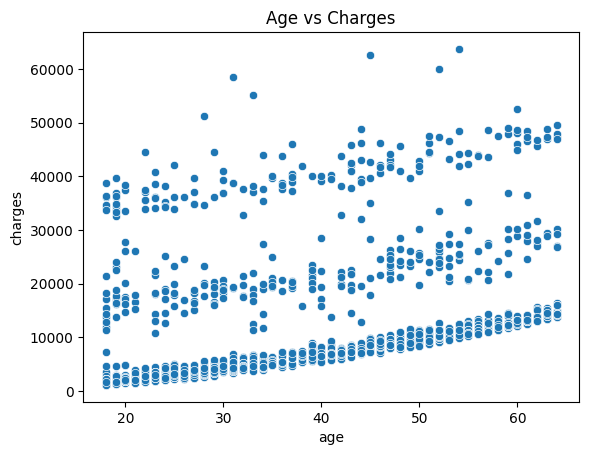

In [84]:
sns.scatterplot(x='age',y='charges',data=df)
plt.title("Age vs Charges")
plt.show()

The scatter plot visualizes the relationship between age and medical charges for individuals in the dataset. While medical charges are spread across a large range for all ages, there is a noticeable trend: medical charges tend to increase with age. The data points show considerable variability, with several individuals incurring very high charges regardless of age group.

## BMI vs Charges

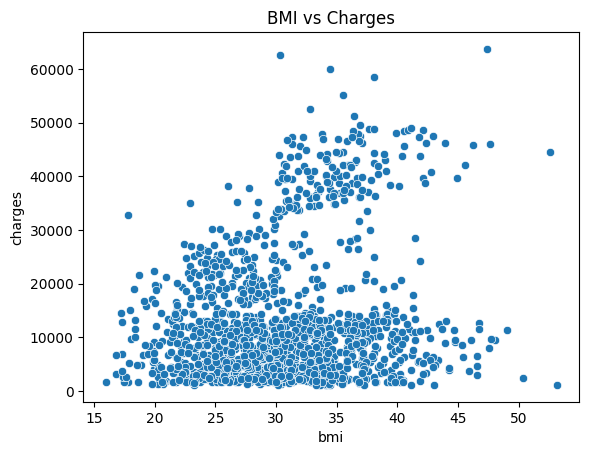

In [85]:
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title("BMI vs Charges")
plt.show()

The scatter plot illustrates the relationship between Body Mass Index (BMI) and medical charges in the dataset. There is a broad spread of charges at nearly every BMI level, with most individuals incurring charges below 15,000.

### Smoker vs Charges

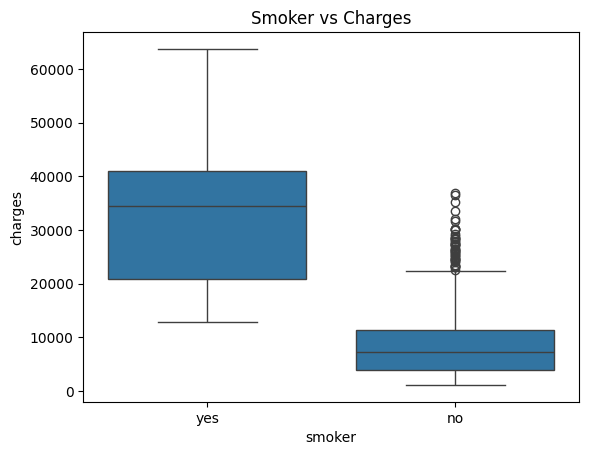

In [86]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.title("Smoker vs Charges")
plt.show()

The box plot visualizes the difference in medical charges between smokers and non-smokers. It is evident that smokers tend to incur significantly higher medical charges compared to non-smokers. The median charges for smokers are much greater, and smokers also show a wider range and higher maximum charges

## Correlation heatmap

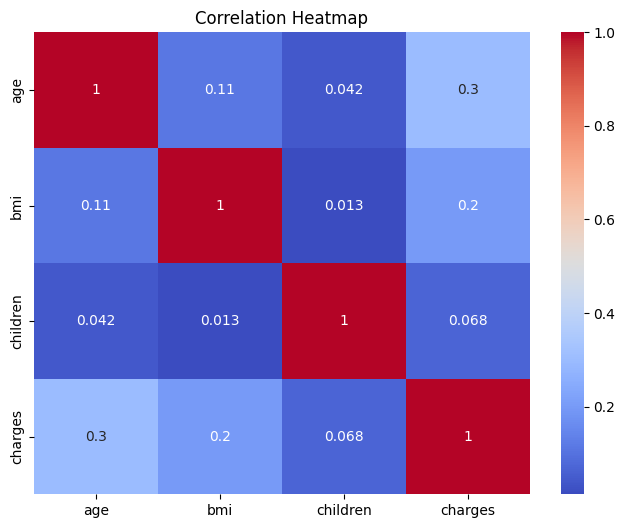

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap provides a visual summary of the linear relationships between numeric variables in the dataset. Charges have the strongest positive correlation with age (0.3) and a moderate correlation with BMI (0.2). The number of children shows only a weak correlation with charges (0.068), suggesting minimal direct impact on medical expenses

# Preprocessing

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error

In [89]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [90]:
categorical_cols = ["sex","smoker","region"]
numeric_cols = ["age","bmi","children"]

### Preprocessing pipeline

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(drop="first",handle_unknown='ignore'),categorical_cols),
        ("num","passthrough",numeric_cols)
    ]
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model: Linear Regression

In [92]:
lr_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LinearRegression())
])

lr_model.fit(X_train,y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression")
print("R2:",r2_score(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Linear Regression
R2: 0.7835929767120722
RMSE: 5796.284659276275


### Random Forest

In [93]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200,random_state=42))
])
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("R2:",r2_score(y_test,y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Random Forest:
R2: 0.8640284627511825
RMSE: 4594.497652286411


### XGBoost

In [94]:
xgb_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",XGBRegressor(n_estimators=500,learning_rate=0.1,random_state=42))
])
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost")
print("R2:",r2_score(y_test,y_pred_xgb))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


XGBoost
R2: 0.8321151933434762
RMSE: 5105.2818991870545


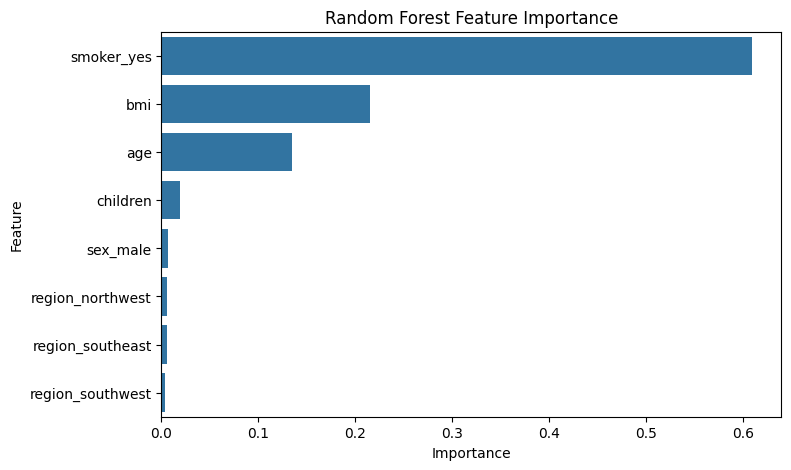

In [95]:
encoded_features = list(lr_model.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(categorical_cols))
all_features = encoded_features + numeric_cols

importances = rf_model.named_steps["model"].feature_importances_
feat_imp = pd.DataFrame({"Feature": all_features, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance",ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance",y="Feature",data = feat_imp)
plt.title("Random Forest Feature Importance")
plt.show()

This bar chart displays the feature importance scores determined by a Random Forest model for predicting medical charges. The most influential factor is smoking status, with 'smoker_yes' having the highest importance by a large margin. BMI and age are also key predictors, ranking next in significance.

Other features—including number of children, sex, and region—show relatively low importance in determining charges. These results highlight the substantial impact of lifestyle factors, especially smoking, on healthcare expenses, and can guide feature selection for modeling and further analysis.

In [96]:
import joblib


joblib.dump(rf_model, "medical_cost_model.pkl")
print("Model saved as medical_cost_model.pkl")


Model saved as medical_cost_model.pkl
